In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("calidadAireGuayaquil.csv")

In [3]:
print("--- Información General del Dataset ---")
df.info()

--- Información General del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    6000 non-null   int64  
 1   location_name  6000 non-null   object 
 2   parameter      6000 non-null   object 
 3   value          6000 non-null   float64
 4   unit           6000 non-null   object 
 5   datetimeUtc    6000 non-null   object 
 6   datetimeLocal  6000 non-null   object 
 7   timezone       6000 non-null   object 
 8   latitude       6000 non-null   float64
 9   longitude      6000 non-null   float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     6000 non-null   object 
 14  provider       6000 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 703.3+ KB


In [4]:
print("\n\n--- Primeras 5 Filas ---")
display(df.head())



--- Primeras 5 Filas ---


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,3175328,Hilton,pm1,11.000000,µg/m³,2024-10-24T04:00:00Z,2024-10-23T23:00:00-05:00,America/Guayaquil,-2.159281,-79.897893,NaN,NaN,NaN,Mayaan,AirGradient
1,3175328,Hilton,pm1,17.170833,µg/m³,2024-10-24T05:00:00Z,2024-10-24T00:00:00-05:00,America/Guayaquil,-2.159281,-79.897893,NaN,NaN,NaN,Mayaan,AirGradient
2,3175328,Hilton,pm1,16.895833,µg/m³,2024-10-24T06:00:00Z,2024-10-24T01:00:00-05:00,America/Guayaquil,-2.159281,-79.897893,NaN,NaN,NaN,Mayaan,AirGradient
3,3175328,Hilton,pm1,21.590909,µg/m³,2024-10-24T07:00:00Z,2024-10-24T02:00:00-05:00,America/Guayaquil,-2.159281,-79.897893,NaN,NaN,NaN,Mayaan,AirGradient
4,3175328,Hilton,pm1,17.337500,µg/m³,2024-10-24T08:00:00Z,2024-10-24T03:00:00-05:00,America/Guayaquil,-2.159281,-79.897893,NaN,NaN,NaN,Mayaan,AirGradient


In [5]:
print("\n\n--- Estadísticas Descriptivas ---")
display(df.describe())



--- Estadísticas Descriptivas ---


,location_id,value,latitude,longitude,country_iso,isMobile,isMonitor
count,6000.0,6000.000000,6000.000000,6.000000e+03,0.0,0.0,0.0
mean,3175328.0,580.843146,-2.159281,-7.989789e+01,NaN,NaN,NaN
std,0.0,1372.911969,0.000000,1.421204e-14,NaN,NaN,NaN
min,3175328.0,4.097333,-2.159281,-7.989789e+01,NaN,NaN,NaN
25%,3175328.0,22.140625,-2.159281,-7.989789e+01,NaN,NaN,NaN
50%,3175328.0,28.632222,-2.159281,-7.989789e+01,NaN,NaN,NaN
75%,3175328.0,57.569083,-2.159281,-7.989789e+01,NaN,NaN,NaN
max,3175328.0,12664.074951,-2.159281,-7.989789e+01,NaN,NaN,NaN


In [6]:
#Preprocesamiento :D

In [7]:
df['datetime'] = pd.to_datetime(df['datetimeLocal'])

In [8]:
df = df.set_index('datetime')

In [9]:
columnas_a_eliminar = ["location_id", "location_name", "unit", "datetimeUtc", 
                       "datetimeLocal", "timezone", "latitude", "longitude",
                       "country_iso", "isMobile", "isMonitor", "owner_name", "provider"]

In [10]:
df_limpio = df.drop(columns=columnas_a_eliminar)

In [11]:
df_pivot = df_limpio.pivot_table(index='datetime', columns='parameter', values='value')

In [12]:
print("--- Tabla Limpia y Pivotada ---")
display(df_pivot.head())

--- Tabla Limpia y Pivotada ---


parameter,pm1,pm10,pm25,relativehumidity,temperature,um003
datetime,,,,,,
2024-10-23 23:00:00-05:00,11.000000,22.333334,20.000000,73.666664,21.200001,2049.000000
2024-10-24 00:00:00-05:00,17.170833,26.987500,25.833333,69.037501,22.344167,3168.050028
2024-10-24 01:00:00-05:00,16.895833,26.916667,25.591667,67.579166,22.732917,3103.224976
2024-10-24 02:00:00-05:00,21.590909,34.222727,30.913636,67.559092,22.798182,4340.086337
2024-10-24 03:00:00-05:00,17.337500,26.429167,24.966667,67.066666,22.813333,3284.975016


In [13]:
print("\n\n--- Nueva Información ---")
df_pivot.info()



--- Nueva Información ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2024-10-23 23:00:00-05:00 to 2024-12-25 12:00:00-05:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm1               1000 non-null   float64
 1   pm10              1000 non-null   float64
 2   pm25              1000 non-null   float64
 3   relativehumidity  1000 non-null   float64
 4   temperature       1000 non-null   float64
 5   um003             1000 non-null   float64
dtypes: float64(6)
memory usage: 54.7 KB


In [14]:
#Graficacion

In [15]:
import plotly.express as px

In [ ]:
#------grafico mal hecho porque la linea de um003 son valores demasiados grandes que hacen que no se aprecie el de los demas

--- Gráfico de todas las variables en el tiempo ---


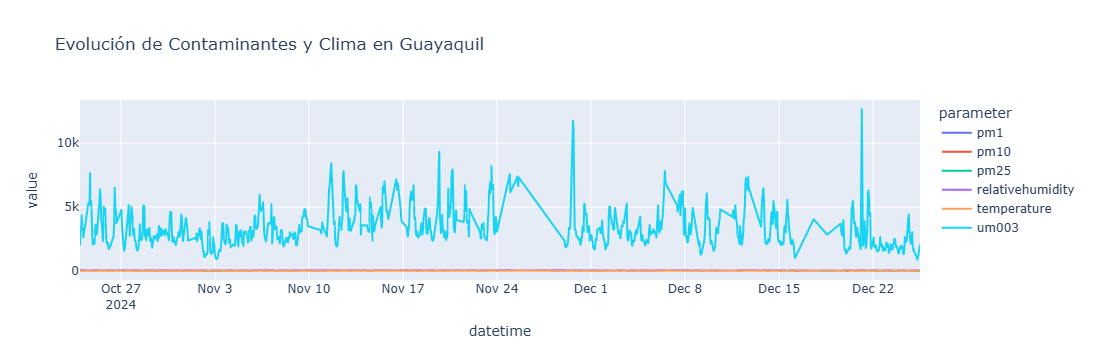

In [16]:
print("--- Gráfico de todas las variables en el tiempo ---")
fig_series = px.line(df_pivot, title='Evolución de Contaminantes y Clima en Guayaquil')
fig_series.show()


--- Mapa de Calor de Correlaciones ---


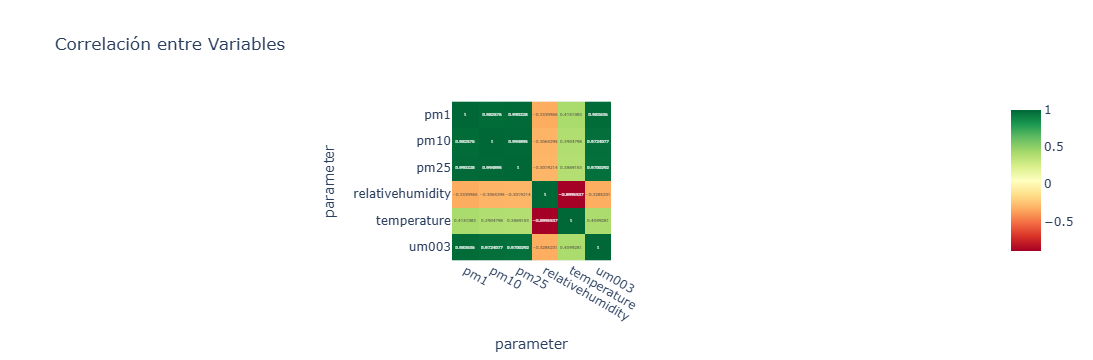

In [17]:
print("\n--- Mapa de Calor de Correlaciones ---")
correlation_matrix = df_pivot.corr()
fig_heatmap = px.imshow(correlation_matrix, title='Correlación entre Variables', text_auto=True, color_continuous_scale='RdYlGn')
fig_heatmap.show()

In [18]:
#-----------correccion de grafico 1 (de Lineas)

--- Gráfico Mejorado: Contaminantes ---


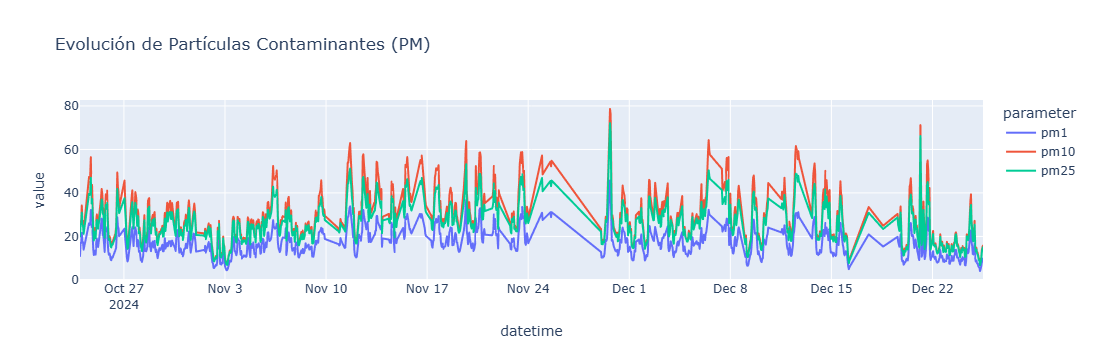

In [19]:
print("--- Gráfico Mejorado: Contaminantes ---")
columnas_contaminantes = ['pm1', 'pm10', 'pm25']
fig_contaminantes = px.line(df_pivot[columnas_contaminantes], title='Evolución de Partículas Contaminantes (PM)')
fig_contaminantes.show()







--- Gráfico Mejorado: Variables Climáticas ---


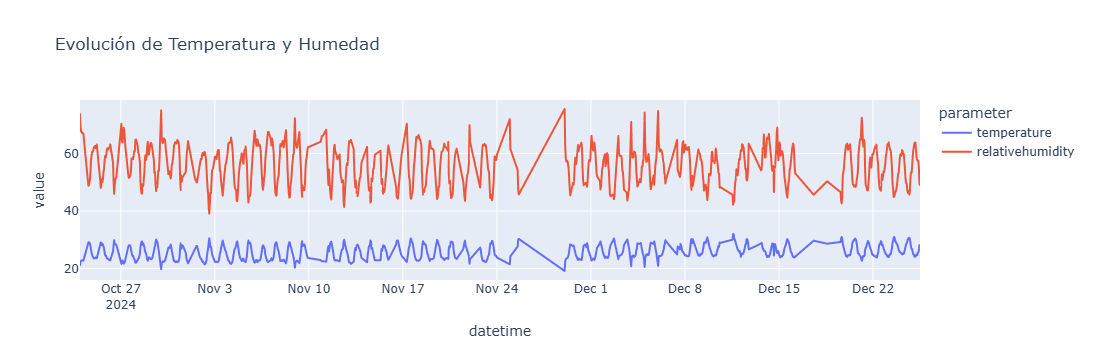

In [20]:
print("\n--- Gráfico Mejorado: Variables Climáticas ---")
columnas_clima = ['temperature', 'relativehumidity']
fig_clima = px.line(df_pivot[columnas_clima], title='Evolución de Temperatura y Humedad')
fig_clima.show()


--- Gráfico de Partículas um003 ---


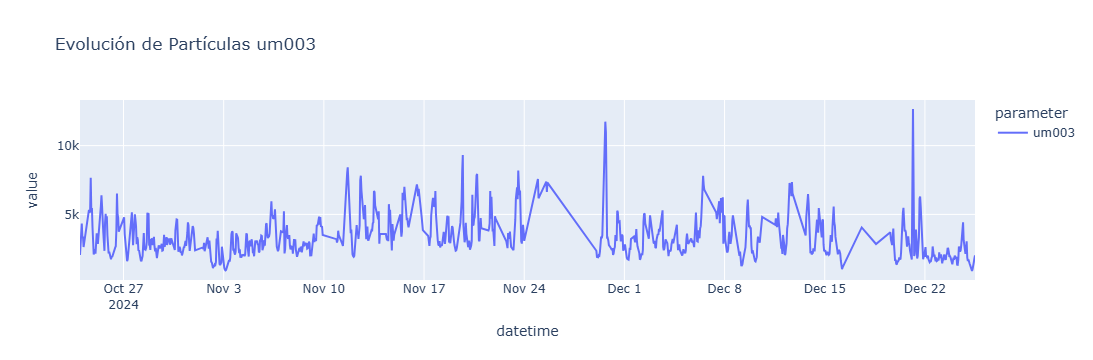

In [22]:
print("\n--- Gráfico de Partículas um003 ---")
fig_um003 = px.line(df_pivot[['um003']], title='Evolución de Partículas um003')
fig_um003.show()

In [21]:
print("\n--- Creando Nuevas Características (Features) ---")
df_final = df_pivot.copy() 

df_final['hora'] = df_final.index.hour
df_final['dia_semana'] = df_final.index.dayofweek
df_final['mes'] = df_final.index.month
df_final['dia_del_año'] = df_final.index.dayofyear

print("Tabla final con las nuevas características:")
display(df_final.head())


--- Creando Nuevas Características (Features) ---
Tabla final con las nuevas características:


parameter,pm1,pm10,pm25,relativehumidity,temperature,um003,hora,dia_semana,mes,dia_del_año
datetime,,,,,,,,,,
2024-10-23 23:00:00-05:00,11.000000,22.333334,20.000000,73.666664,21.200001,2049.000000,23,2,10,297
2024-10-24 00:00:00-05:00,17.170833,26.987500,25.833333,69.037501,22.344167,3168.050028,0,3,10,298
2024-10-24 01:00:00-05:00,16.895833,26.916667,25.591667,67.579166,22.732917,3103.224976,1,3,10,298
2024-10-24 02:00:00-05:00,21.590909,34.222727,30.913636,67.559092,22.798182,4340.086337,2,3,10,298
2024-10-24 03:00:00-05:00,17.337500,26.429167,24.966667,67.066666,22.813333,3284.975016,3,3,10,298
